<a href="https://colab.research.google.com/github/Prince6112/Hand-written-digit-recognition/blob/main/Handwritten_Digits_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handwritten Digits Recognition

###Group 9

>Rohan Kumar Mehta RA1811027010088
>
>Prince Samvuel RA1811027010099
>
>Rishabh Kumar RA1811027010092

1. Introduction
2. Data preparation
 * Load data
 * Check for null and missing values
 * Normalization
 * Split training and valdiation set
3. CNN
 * Define the model
 * Set the optimizer and loss function
4. Evaluate the model
 * Training and validation curves
5. Prediction and submition


## Introduction
This is a 2 layers Sequential Convolutional Neural Network for digits recognition trained on MNIST dataset. It uses TensorFlow with keras API (Tensorflow backend) which is very intuitive. Firstly, I will prepare the data (handwritten digits images) then i will focus on the CNN modeling and evaluation.


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Load data from MNIST Dataset
the train set is splitted into two parts : a small fraction (20%) became the validation set which the model is evaluated and the rest (80%) is used to train the model.

In [ ]:
(xtrain, ytrain), (xtest, ytest)=tf.keras.datasets.mnist.load_data()
Xtrain, Xval, Ytrain, Yval = train_test_split(xtrain, ytrain, test_size=0.1, shuffle=True)

#Data Exploration
We explore the dataset a bit before inspection, like looking at its shape

In [ ]:
print("Training dataset shape: ",xtrain.shape,ytrain.shape,"\nTesting dataset shape: ",xtest.shape,ytest.shape)

Training dataset shape:  (60000, 28, 28) (60000,) 
Testing dataset shape:  (10000, 28, 28) (10000,)


#Dataset Inspection
looking at various a few data items in the dataset before preprossing

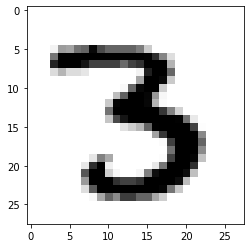

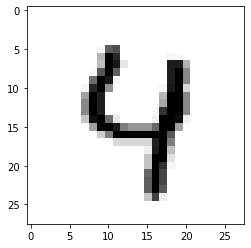

In [ ]:
import matplotlib
some_digit = xtrain[12]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()
some_digit = xtrain[2452]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary)
plt.show()


#Data Preprocessing
We perform a grayscale normalization to reduce the effect of illumination's differences. Moreover the CNN converg faster on [0..1] data rather than on [0..255].

In [ ]:
Xtrain=Xtrain/255.0
xtest=xtest/255.0

We can get a better sense for one of these examples by visualising the image and looking at the label

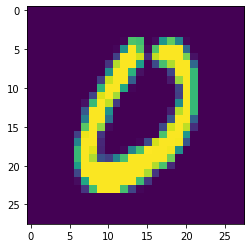

In [ ]:
g = plt.imshow(Xtrain[0])

# Define the Model
The Flatten layer is use to convert the 2D or 3D images or feature vector into a one single 1D vector, which is connected with fully connected layers.
Our model consist of an input layer, 2 hidden layers with 'relu' activation function and an output layer with 'softmax' activaiton function which will be used to classify between 10 different classes.
We've also used dropouts to reduce overfitting and hence improving our model's performance.

#1. Simple Neural Network
>In this model we are not using any convolution or dropouts or any normalization techniques, we are just going to use fully connected layers with 'relu' activation function in the hidden layers and 'softmax' activation in the output layer.



In [ ]:
model=tf.keras.Sequential([
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(1024, activation='relu'),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dense(256, activation='relu'),
                           tf.keras.layers.Dense(128, activation='relu'),
                           tf.keras.layers.Dense(10, activation='softmax')
])
model.build(Xtrain.shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (54000, 784)              0         
_________________________________________________________________
dense (Dense)                (54000, 1024)             803840    
_________________________________________________________________
dense_1 (Dense)              (54000, 512)              524800    
_________________________________________________________________
dense_2 (Dense)              (54000, 256)              131328    
_________________________________________________________________
dense_3 (Dense)              (54000, 128)              32896     
_________________________________________________________________
dense_4 (Dense)              (54000, 10)               1290      
Total params: 1,494,154
Trainable params: 1,494,154
Non-trainable params: 0
______________________________________________

#Optimization
In our model we're using 'adams' optimizer, Adam is a replacement optimization algorithm for stochastic gradient descent for training deep learning models. Adam combines the best properties of the AdaGrad and RMSProp algorithms to provide an optimization algorithm that can handle sparse gradients on noisy problems.

Insofar, RMSprop, Adadelta, and Adam are very similar algorithms that do well in similar circumstances. Kingma et al. show that its bias-correction helps Adam slightly outperform RMSprop towards the end of optimization as gradients become sparser. Insofar, Adam might be the best overall choice.

The loss function we are using is 'sparse categorical crossentropy', the only difference between sparse categorical cross entropy and categorical cross entropy is the format of true labels. When we have a single-label, multi-class classification problem, the labels are mutually exclusive for each data, meaning each data entry can only belong to one class.

One advantage of using sparse categorical cross entropy is it saves time in memory as well as computation because it simply uses a single integer for a class, rather than a whole vector.

We are going to use two optimizer i.e. SGD and adam, the one who performs better will be used for further model.

In [ ]:
SGDmodel=model
SGDmodel.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=SGDmodel.fit(Xtrain, Ytrain, epochs=10, validation_data=(Xval, Yval))

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5446 - accuracy: 0.8545 - val_loss: 34.8955 - val_accuracy: 0.9188
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2187 - accuracy: 0.9372 - val_loss: 26.5959 - val_accuracy: 0.9427
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1616 - accuracy: 0.9531 - val_loss: 21.2560 - val_accuracy: 0.9547
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1266 - accuracy: 0.9636 - val_loss: 20.2426 - val_accuracy: 0.9572
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1021 - accuracy: 0.9701 - val_loss: 23.1056 - val_accuracy: 0.9532
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0842 - accuracy: 0.9753 - val_loss: 16.2575 - val_accuracy: 0.9650
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0698 - accuracy: 0.9793 - val_loss: 15.9760 - val_ac

#Training and Validation Curves for SGD

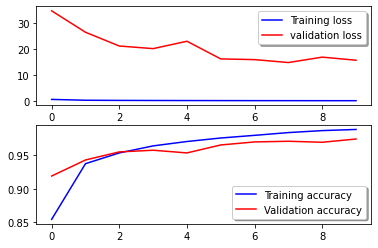

In [ ]:
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
ADAMmodel=model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(Xtrain, Ytrain, epochs=10, validation_data=(Xval, Yval))

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1676 - accuracy: 0.9497 - val_loss: 24.6556 - val_accuracy: 0.9547
Epoch 2/10
1688/1688 [==============================] - 4s 3ms/step - loss: 0.0974 - accuracy: 0.9709 - val_loss: 13.6321 - val_accuracy: 0.9755
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0711 - accuracy: 0.9787 - val_loss: 18.5013 - val_accuracy: 0.9692
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0573 - accuracy: 0.9827 - val_loss: 19.0121 - val_accuracy: 0.9745
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0486 - accuracy: 0.9849 - val_loss: 21.0117 - val_accuracy: 0.9758
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0410 - accuracy: 0.9876 - val_loss: 18.6617 - val_accuracy: 0.9795
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.0351 - accuracy: 0.9901 - val_loss: 21.9155 - val_ac

#Training and Validation Curves for ADAM

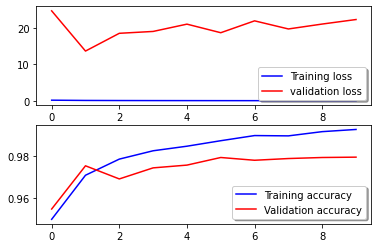

In [ ]:
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

As we can see that we got better training accuraccy using Adams optimizer in training set and approximately same accuraccy in validation set so for further operations we are going to use Adams optimizer.

#2. Simple Convolutional Neural Networks(CNN)
>In CNN we are going to pre process the image little bit to extract useful features like horzontal edge and vertical edge etc. using convolutional layers.

In [ ]:
SCNNmodel=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(1024, activation='relu'),
                           tf.keras.layers.Dense(100, activation='relu'),
                           tf.keras.layers.Dense(10, activation='softmax')
])

SCNNmodel.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              5538816   
_________________________________________________________________
dense_6 (Dense)              (None, 100)               102500    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 5,642,646
Trainable params: 5,642,646
Non-trainable params: 0
____________________________________________

In [ ]:
Xtrain=Xtrain.reshape(-1, 28, 28, 1)
Xval=Xval.reshape(-1, 28, 28, 1)
xtest=xtest.reshape(-1, 28, 28, 1)

In [ ]:
SCNNmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=SCNNmodel.fit(Xtrain, Ytrain, epochs=10, validation_data=(Xval, Yval))

Epoch 1/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.1260 - accuracy: 0.9617 - val_loss: 53.3044 - val_accuracy: 0.9317
Epoch 2/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0416 - accuracy: 0.9867 - val_loss: 58.9414 - val_accuracy: 0.9437
Epoch 3/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0246 - accuracy: 0.9919 - val_loss: 105.5597 - val_accuracy: 0.9060
Epoch 4/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0166 - accuracy: 0.9950 - val_loss: 89.7655 - val_accuracy: 0.9342
Epoch 5/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 183.1866 - val_accuracy: 0.8972
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0103 - accuracy: 0.9970 - val_loss: 75.6567 - val_accuracy: 0.9508
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0091 - accuracy: 0.9974 - val_loss: 151.0368 - val

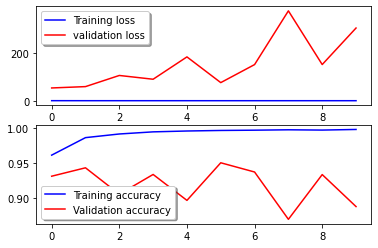

In [ ]:
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

As we can see our model tends to overfit with accuraccy very close to 100 percent, which mess up our validation accuraccy, so we will introduce and dropouts to reduce overfitting and imporve our performance.

#3. CNN with Dropouts

In [ ]:
CNNmodel=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(1024, activation='relu'),
                           tf.keras.layers.Dropout(0.3),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.Dense(10, activation='softmax')
])

CNNmodel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1024)              820224    
_________________________________________________________________
dropout (Dropout)            (None, 1024)             

In [ ]:
CNNmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=CNNmodel.fit(Xtrain, Ytrain, epochs=10, validation_data=(Xval, Yval))

Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1363 - accuracy: 0.9573 - val_loss: 12.8216 - val_accuracy: 0.9825
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 14.4044 - val_accuracy: 0.9732
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 16.9388 - val_accuracy: 0.9758
Epoch 4/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0297 - accuracy: 0.9908 - val_loss: 16.8319 - val_accuracy: 0.9773
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0244 - accuracy: 0.9921 - val_loss: 21.1507 - val_accuracy: 0.9757
Epoch 6/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0213 - accuracy: 0.9935 - val_loss: 14.1672 - val_accuracy: 0.9843
Epoch 7/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0181 - accuracy: 0.9943 - val_loss: 16.4623 - val_ac

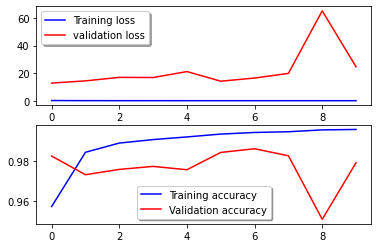

In [ ]:
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

#4. CNN with Dropouts and Batch Normalization

In [ ]:
CNNsmodel=tf.keras.Sequential([
                           tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
                           tf.keras.layers.MaxPool2D(2,2),
                           tf.keras.layers.Flatten(),
                           tf.keras.layers.Dense(1024, activation='relu'),
                           tf.keras.layers.Dropout(0.3),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense(512, activation='relu'),
                           tf.keras.layers.Dropout(0.2),
                           tf.keras.layers.BatchNormalization(),
                           tf.keras.layers.Dense(10, activation='softmax')
])

CNNsmodel.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              820224    
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)             

In [ ]:
CNNsmodel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history=CNNsmodel.fit(Xtrain, Ytrain, epochs=10, validation_data=(Xval, Yval))

Epoch 1/10
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1879 - accuracy: 0.9430 - val_loss: 0.0987 - val_accuracy: 0.9760
Epoch 2/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0806 - accuracy: 0.9752 - val_loss: 0.0616 - val_accuracy: 0.9805
Epoch 3/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0843 - accuracy: 0.9736 - val_loss: 0.0641 - val_accuracy: 0.9815
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.0676 - val_accuracy: 0.9843
Epoch 5/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0540 - accuracy: 0.9827 - val_loss: 0.0884 - val_accuracy: 0.9817
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0452 - accuracy: 0.9860 - val_loss: 0.0560 - val_accuracy: 0.9857
Epoch 7/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0411 - accuracy: 0.9872 - val_loss: 0.0446 - val_accuracy:

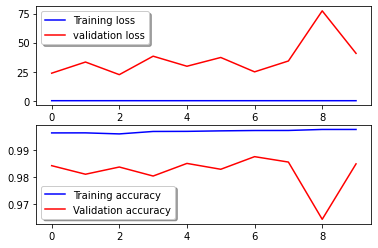

In [ ]:
fig, ax = plt.subplots(2,1)

ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
classes_name = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

# Results
Lets see how well our model is working on test set

#1. SGD

In [ ]:
SGDmodel.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0886 - accuracy: 0.9806


[0.08862534165382385, 0.9805999994277954]

Confusion Matrix


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f07304d4048>)

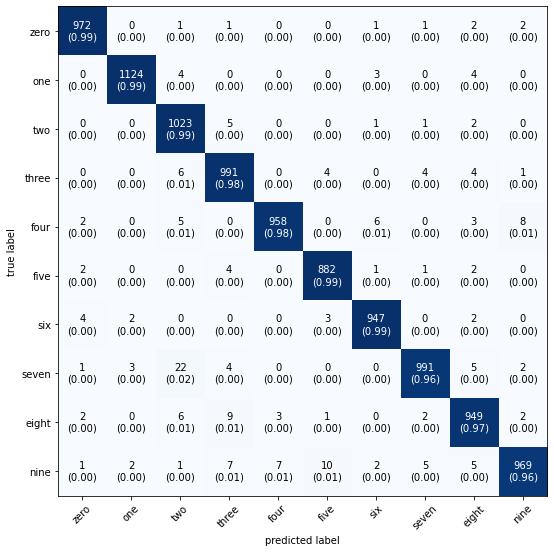

In [ ]:
y_pred = SGDmodel.predict_classes(xtest)
mat = confusion_matrix(ytest, y_pred)
plot_confusion_matrix(mat,figsize=(9,9), class_names=classes_name, show_normed=True)

Precision and recall


In [ ]:
print (classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#2. Adams

In [ ]:
ADAMmodel.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0886 - accuracy: 0.9806


[0.08862534165382385, 0.9805999994277954]

Confusion Matrix

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f07303fa6a0>)

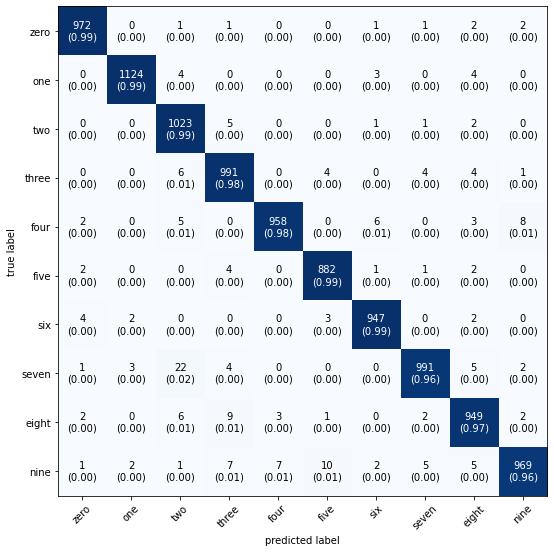

In [ ]:
y_pred = ADAMmodel.predict_classes(xtest)
mat = confusion_matrix(ytest, y_pred)
plot_confusion_matrix(mat,figsize=(9,9), class_names=classes_name, show_normed=True)

Precision and recall

In [ ]:
print (classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.99      0.97      1032
           3       0.97      0.98      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.96      0.97      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#3. Simple Convolutional Neural Networks(CNN)

In [ ]:
xtest=xtest.reshape(-1, 28, 28, 1)
SCNNmodel.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9842


[0.08094913512468338, 0.9842000007629395]

Confusion Matrix

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f07302989e8>)

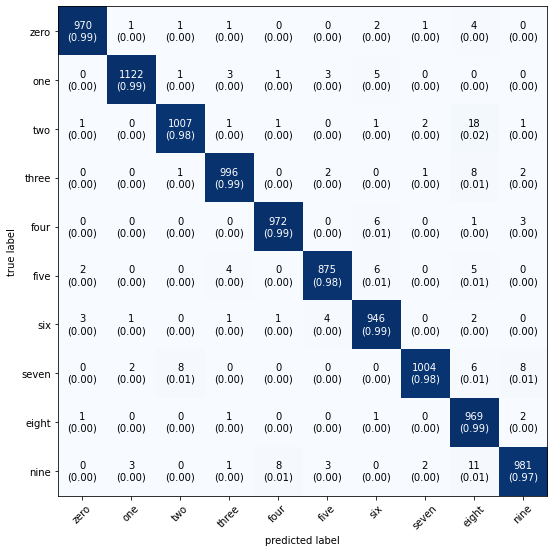

In [ ]:
y_pred = SCNNmodel.predict_classes(xtest)
mat = confusion_matrix(ytest, y_pred)
plot_confusion_matrix(mat,figsize=(9,9), class_names=classes_name, show_normed=True)

Precision and recall

In [ ]:
print (classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.95      0.99      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



#4. CNN with Dropouts

In [ ]:
CNNmodel.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0886 - accuracy: 0.9873


[0.08859716355800629, 0.9872999787330627]

Confusion Matrix

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f073010f518>)

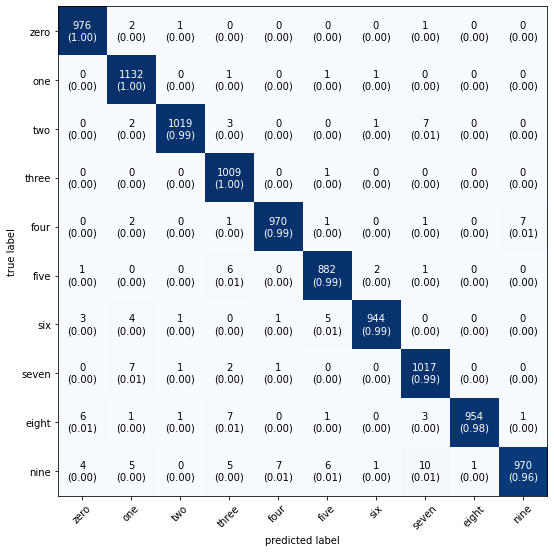

In [ ]:
y_pred = CNNmodel.predict_classes(xtest)
mat = confusion_matrix(ytest, y_pred)
plot_confusion_matrix(mat,figsize=(9,9), class_names=classes_name, show_normed=True)

Precision and recall

In [ ]:
print (classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.98      1.00      0.99      1135
           2       1.00      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#5. CNN with Dropouts and Batch Normalization

In [ ]:
CNNsmodel.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.0309 - accuracy: 0.9909


[0.030933566391468048, 0.9908999800682068]

Confusion Matrix

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f078003c5c0>)

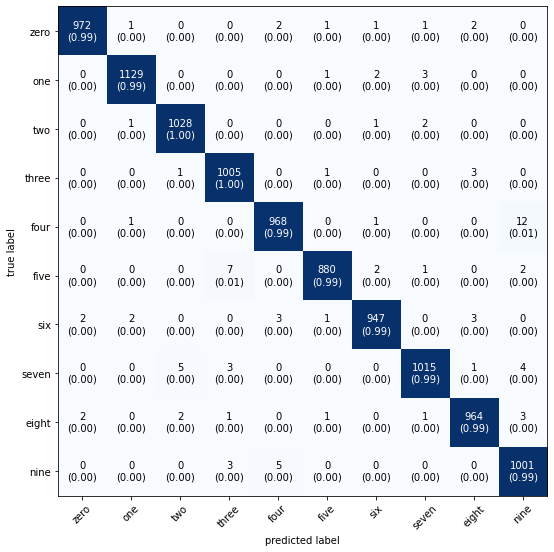

In [ ]:
y_pred = CNNsmodel.predict_classes(xtest)
mat = confusion_matrix(ytest, y_pred)
plot_confusion_matrix(mat,figsize=(9,9), class_names=classes_name, show_normed=True)

Precision and recall


In [ ]:
print (classification_report(ytest, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



#Performance
1. SGD test accuracy 98.06%
2. Adams test accuracy 98.06%
3. Simple Convolutional Neural Networks(CNN) test accuracy 98.42%
4. CNN with Dropouts test accuracy 98.73%
5. CNN with Dropouts and Batch Normalization test accuracy 99.09%

As you can see that CNN with dropouts and batch normalization performs best on test out of all given models